### 상관분석과 회귀분석

#### 1. 상관분석

##### 상관계수

>* `피어슨상관계수` : 두 변수간의 관련성을 위해서 보편적으로 사용됨
 - 일반적으로 r의 값이
   - -1.0 ~ -0.7 : 강한상관관계(음), -0.7~0.3 : 뚜렷, -0.3~-0.1 약한, -0.1~0.1 무시
   - 0.7 ~ 1.0 : 강한상관관계(양), 0.3~0.7 : 뚜렷, 0.1~0.3 약한  
   
* `스피어맨상관계수` : 데이터가 서열척도인 경우 즉, 자료의 값대신에 순위를 이용하는 경우
 - 두 변수간의 연관관계의 유무를 판단할 때 유용한다.
 - -1 ~ 1사이의 값을 가지는데 `두 변수안의 순위`가 완전히 일치하면 +1, 반대이면 -1

In [1]:
x <- c(0,1,4,9,16)
mean(x)
y <- c(1,2,3,4)
z <- c(0,5,7,9)

# y, z간의 상관관계?
# cor() 
# 절대값 1에 가까울 수록 상관관계가 높음, 0에 가까울 수록 상관관계가 낮음
cor(y,z,method='pearson')
cor(y,z,method='spearman')

[1] 6

[1] 0.9693631

[1] 1

#### 실습 1. 담배값의 인상이 흡연에 미치는 영향 분석

* 귀무가설 : 담배값인상과 흡연과 상관관계가 없다.
* 대립가설 : 담배값인상과 흡연과 상관관계가 있다.

샘플데이터
인상전 매출액: 70,72,62,64,71,76,0,65,74,72
인상후 매출액: 70,74,65,68,72,74,61,66,76,75      

In [2]:
x <- c(70,72,62,64,71,76,0,65,74,72)   # 인상전 매출액
y <- c(70,74,65,68,72,74,61,66,76,75)  # 인상후 매출액

cor(x, y, method='pearson') 
cor(x, y, method='spearman') 
cor.test(x, y, method='spearman') 
# 결과분석
# p-value가 0.77, s-value 0.92
# cor(상관계수) 0.77 (양의 상관관계) : 
# 담배인상과 흡연과의 상관관계가 있다. 즉, 대립가설을 채택

[1] 0.7729264

[1] 0.929878

Warning message in cor.test.default(x, y, method = "spearman"):
"Cannot compute exact p-value with ties"


	Spearman's rank correlation rho

data:  x and y
S = 11.57, p-value = 9.713e-05
alternative hypothesis: true rho is not equal to 0
sample estimates:
     rho 
0.929878 


#### 2. 회귀분석

* 독립변수가 증가할 때 종속변수에 미치는 영향을 측정하기 위한 통계적 예측모형

In [4]:
# 임의로 생성한 데이터
regression <- read.csv('../data/R/regression.csv')
head(regression)
tail(regression)

age,height,weight
0~3개월,59.1,5.9
3~6개월,66.7,8.0
6~9개월,71.4,8.9
9~12개월,75.0,10.1
12~18개월,80.1,10.9
2세,87.8,13.2


,age,height,weight
15,30~34세,171.3,71.5
16,35~39세,170.7,72.3
17,40~49세,168.6,70.6
18,50~59세,166.1,69.1
19,60~69세,164.4,65.9
20,70세이상,162.4,61.1


In [5]:
# 자료는 임의로 생성한 자료이기 때문에 결과는 의미가 없다.
summary(regression$height)
summary(regression$weight)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  59.10   85.88  118.75  119.22  162.90  171.30 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5.90   12.62   23.20   33.40   62.30   72.30 

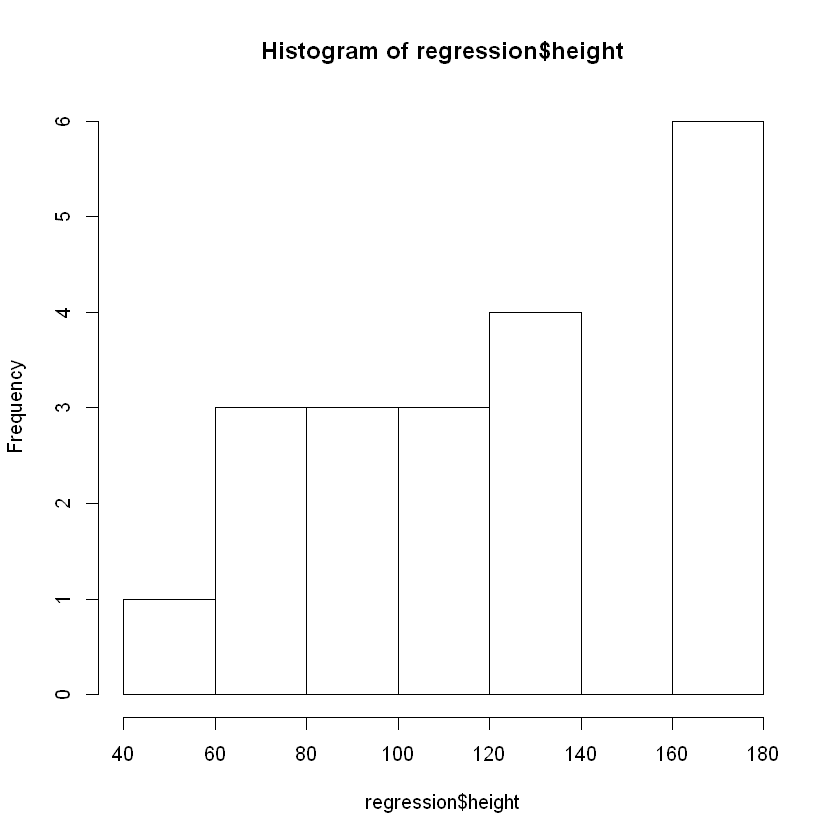

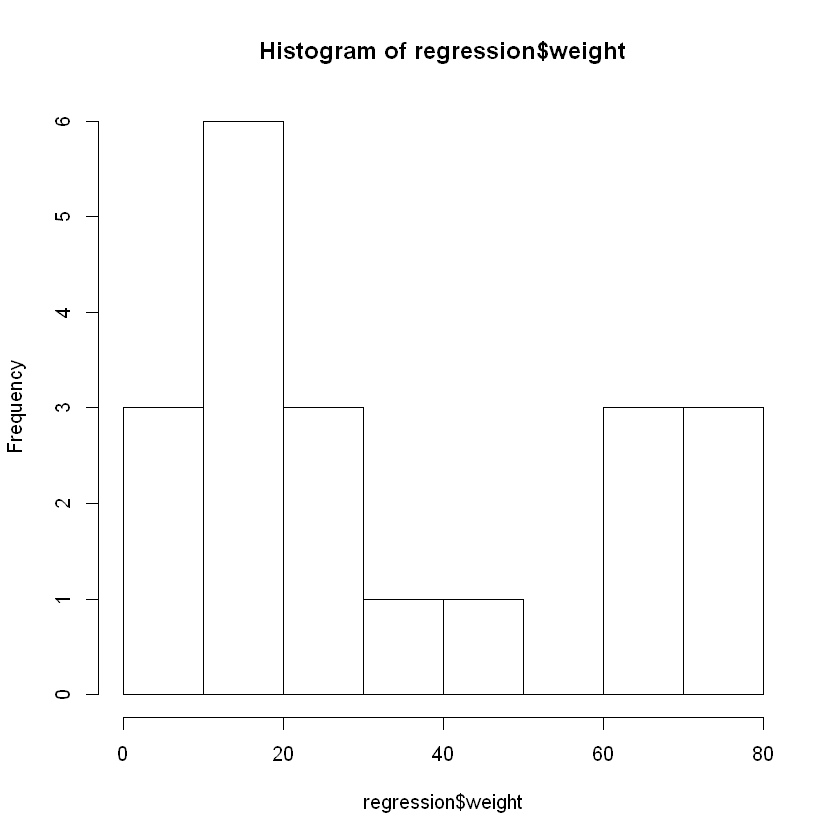

In [6]:
# 시각화(1) : 자료의 빈도수
hist(regression$height)
hist(regression$weight)

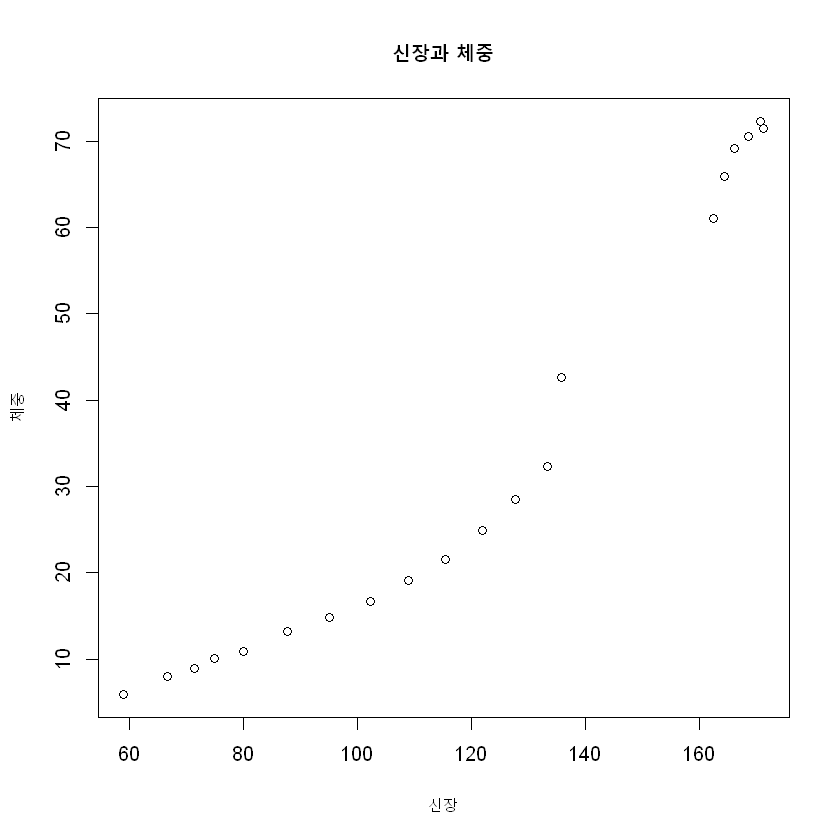

In [7]:
# 시각화(2) : 산점도
plot(regression$weight~regression$height, main="신장과 체중", xlab="신장", ylab='체중')

# 결과분석
# 신장이 커지면 체중도 커지는 양의 상관관계가 있다.

In [8]:
# 1. 상관분석
# -1~1사이의 값
cor(regression$height,regression$weight)

# 결과분석
# 상관계수가 0.96 -> 아주 강한 양의 상관관계가 있다.

[1] 0.9620197


Call:
lm(formula = regression$height ~ regression$weight)

Coefficients:
      (Intercept)  regression$weight  
           69.772              1.481  


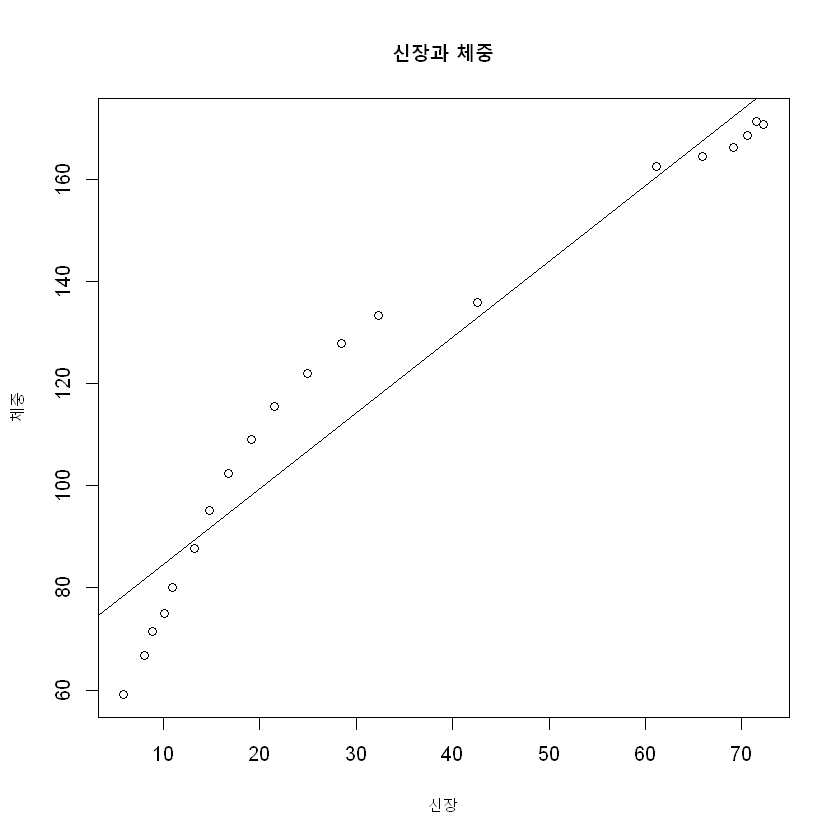

In [9]:
# 2. 단순회귀분석
# 독립변수가 신장(x), 종속변수가 체중(y)
# 귀무가설 : 신장은 체중에 영향을 주지 않을 것이다.
# 대립가설 : 신장은 체중에 영향을 줄 것이다.

# 회귀선 : 각 관측치들과 `평균의 차이의 제곱`이 최소가 되는 직선
# 회귀모델 : lm(x~y) -> x가 증가할 때 y에 미치는 영향
r <- lm(regression$height~regression$weight)
r

# Intercept :  69.772 = 절편
# regression$weight 1.481 -> 신장이 1이 증가되면 체중은 1.481로 증가
plot(regression$height~regression$weight, main="신장과 체중", xlab="신장", ylab="체중")

# abline : 그래프위에 선을 그리는 함수
# abline(회귀선)은 각 값들의 평균제곱오차가 제일 작은 값을 기준으로 선을 그림
abline(r)

In [10]:
summary(r)
# 회귀분석결과분석요약
# Multiple R-squared:  0.9255, Adjusted R-squared:  0.9213 : 평균제곱오차(R)은 주로
# Adjusted R-squared을 주로 본다/
# Adjusted R-squared : R제곱값이 92.13이기 때문에 92%설명력을 가진다.
# p-value: 1.361e-11가 0.05보다 작으므로 통계적으로 99%이상의 신뢰도를 가진다.
# 따라서 귀무가설을 기각하고 대립가설을 채택한다.


Call:
lm(formula = regression$height ~ regression$weight)

Residuals:
    Min      1Q  Median      3Q     Max 
-19.409  -6.034  -2.240   8.584  15.824 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       69.77179    4.10539   17.00 1.57e-12 ***
regression$weight  1.48086    0.09904   14.95 1.36e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 10.88 on 18 degrees of freedom
Multiple R-squared:  0.9255,	Adjusted R-squared:  0.9213 
F-statistic: 223.6 on 1 and 18 DF,  p-value: 1.361e-11


#### 실습2. 다중회귀분석


In [11]:
# R에 내장된 데이터셋
data()
head(attitude)
tail(attitude)
?attitud

rating,complaints,privileges,learning,raises,critical,advance
43,51,30,39,61,92,45
63,64,51,54,63,73,47
71,70,68,69,76,86,48
61,63,45,47,54,84,35
81,78,56,66,71,83,47
43,55,49,44,54,49,34


,rating,complaints,privileges,learning,raises,critical,advance
25,63,54,42,48,66,75,33
26,66,77,66,63,88,76,72
27,78,75,58,74,80,78,49
28,48,57,44,45,51,83,38
29,85,85,71,71,77,74,55
30,82,82,39,59,64,78,39


In [12]:
# 다중회귀분석
#lm(종속변수~., data=데이터셋) -> 점(.)은 종속변수를 제외한 모든 변수를 선택 -> 독립변수
model <- lm(rating~., data=attitude)
model


Call:
lm(formula = rating ~ ., data = attitude)

Coefficients:
(Intercept)   complaints   privileges     learning       raises     critical  
   10.78708      0.61319     -0.07305      0.32033      0.08173      0.03838  
    advance  
   -0.21706  


In [13]:
summary(model)
# 회귀분석모델분석요약
# complaints(***)와 learning(.)이 제일 중요한 값이다.
# Adjusted R-squared:  0.6628 으로서 66%정도의 설명력을 가진다.
# p-value: 1.24e-05 : 99% 신뢰하에 통계적으로 유의한다.


Call:
lm(formula = rating ~ ., data = attitude)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.9418  -4.3555   0.3158   5.5425  11.5990 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.78708   11.58926   0.931 0.361634    
complaints   0.61319    0.16098   3.809 0.000903 ***
privileges  -0.07305    0.13572  -0.538 0.595594    
learning     0.32033    0.16852   1.901 0.069925 .  
raises       0.08173    0.22148   0.369 0.715480    
critical     0.03838    0.14700   0.261 0.796334    
advance     -0.21706    0.17821  -1.218 0.235577    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.068 on 23 degrees of freedom
Multiple R-squared:  0.7326,	Adjusted R-squared:  0.6628 
F-statistic:  10.5 on 6 and 23 DF,  p-value: 1.24e-05


In [14]:
# step() : 기여도가 낮은 변수를 제가하여 회귀모델의 예측력을 향상
# direction='backward' : 기여도가 낮은 것부터 제외
reduced <- step(model, direction='backward')

Start:  AIC=123.36
rating ~ complaints + privileges + learning + raises + critical + 
    advance

             Df Sum of Sq    RSS    AIC
- critical    1      3.41 1152.4 121.45
- raises      1      6.80 1155.8 121.54
- privileges  1     14.47 1163.5 121.74
- advance     1     74.11 1223.1 123.24
<none>                    1149.0 123.36
- learning    1    180.50 1329.5 125.74
- complaints  1    724.80 1873.8 136.04

Step:  AIC=121.45
rating ~ complaints + privileges + learning + raises + advance

             Df Sum of Sq    RSS    AIC
- raises      1     10.61 1163.0 119.73
- privileges  1     14.16 1166.6 119.82
- advance     1     71.27 1223.7 121.25
<none>                    1152.4 121.45
- learning    1    177.74 1330.1 123.75
- complaints  1    724.70 1877.1 134.09

Step:  AIC=119.73
rating ~ complaints + privileges + learning + advance

             Df Sum of Sq    RSS    AIC
- privileges  1     16.10 1179.1 118.14
- advance     1     61.60 1224.6 119.28
<none>                  

In [15]:
summary(reduced)
# 회귀분석모델분석요약
# 최종적으로 독립변수를 complaints + learning의 2개변수 이외는 제거
# 모델의 예측력(설명력)이 66%에서 68%로 향상됨


Call:
lm(formula = rating ~ complaints + learning, data = attitude)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.5568  -5.7331   0.6701   6.5341  10.3610 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.8709     7.0612   1.398    0.174    
complaints    0.6435     0.1185   5.432 9.57e-06 ***
learning      0.2112     0.1344   1.571    0.128    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.817 on 27 degrees of freedom
Multiple R-squared:  0.708,	Adjusted R-squared:  0.6864 
F-statistic: 32.74 on 2 and 27 DF,  p-value: 6.058e-08


In [16]:
reduced <- step(model, direction='forward')
summary(reduced)

Start:  AIC=123.36
rating ~ complaints + privileges + learning + raises + critical + 
    advance




Call:
lm(formula = rating ~ complaints + privileges + learning + raises + 
    critical + advance, data = attitude)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.9418  -4.3555   0.3158   5.5425  11.5990 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.78708   11.58926   0.931 0.361634    
complaints   0.61319    0.16098   3.809 0.000903 ***
privileges  -0.07305    0.13572  -0.538 0.595594    
learning     0.32033    0.16852   1.901 0.069925 .  
raises       0.08173    0.22148   0.369 0.715480    
critical     0.03838    0.14700   0.261 0.796334    
advance     -0.21706    0.17821  -1.218 0.235577    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.068 on 23 degrees of freedom
Multiple R-squared:  0.7326,	Adjusted R-squared:  0.6628 
F-statistic:  10.5 on 6 and 23 DF,  p-value: 1.24e-05
